In [1]:
import pandas as pd

# 데이터 로드
file_path = r"K:\SPARTA\학습자료\Python\marketing_project\target_df2.csv"
target_df2 = pd.read_csv(file_path)

# 데이터 기본 정보 확인
print("기본 정보:")
print(target_df2.info())

# 데이터 간략한 통계 확인
print("\n기술 통계:")
print(target_df2.describe())

# 결측치 확인
print("\n결측치 확인:")
print(target_df2.isnull().sum())

# 데이터 첫 5행 확인
print("\n데이터 샘플:")
print(target_df2.head())

# 데이터 타입 확인
print("\n컬럼별 데이터 타입:")
print(target_df2.dtypes)


기본 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66586 entries, 0 to 66585
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   order_id                  66586 non-null  object 
 1   payment_type              66586 non-null  object 
 2   customer_id               66586 non-null  object 
 3   order_item_id             66586 non-null  int64  
 4   product_id                66586 non-null  object 
 5   seller_id                 66586 non-null  object 
 6   shipping_charges          66586 non-null  float64
 7   payment_installments      66586 non-null  int64  
 8   product_weight_g          66586 non-null  float64
 9   customer_zip_code_prefix  66586 non-null  int64  
 10  customer_state            66586 non-null  object 
 11  total_payment             66586 non-null  float64
 12  ppu                       66586 non-null  float64
 13  volume                    66586 non-null  float64
 14 

In [17]:
import os 
path = '/Users/jun/GitStudy/Data_4/Data/eCommerce3/'
os.chdir(path)

In [22]:
target_df2 = pd.read_csv('target_df2.csv')

/var/folders/29/5wmqbm4j3x10qv5vgm_bm8f80000gn/T/ipykernel_39338/3144463792.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/29/5wmqbm4j3x10qv5vgm_bm8f80000gn/T/ipykernel_39338/3144463792.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/29/5wmqbm4j3x10qv5vgm_bm8f80000gn/T/ipykernel_39338/3144463792.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/29/5wmqbm4j3x10qv5vgm_bm8f80000gn/T/ipykernel_39338/3144463792.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated a

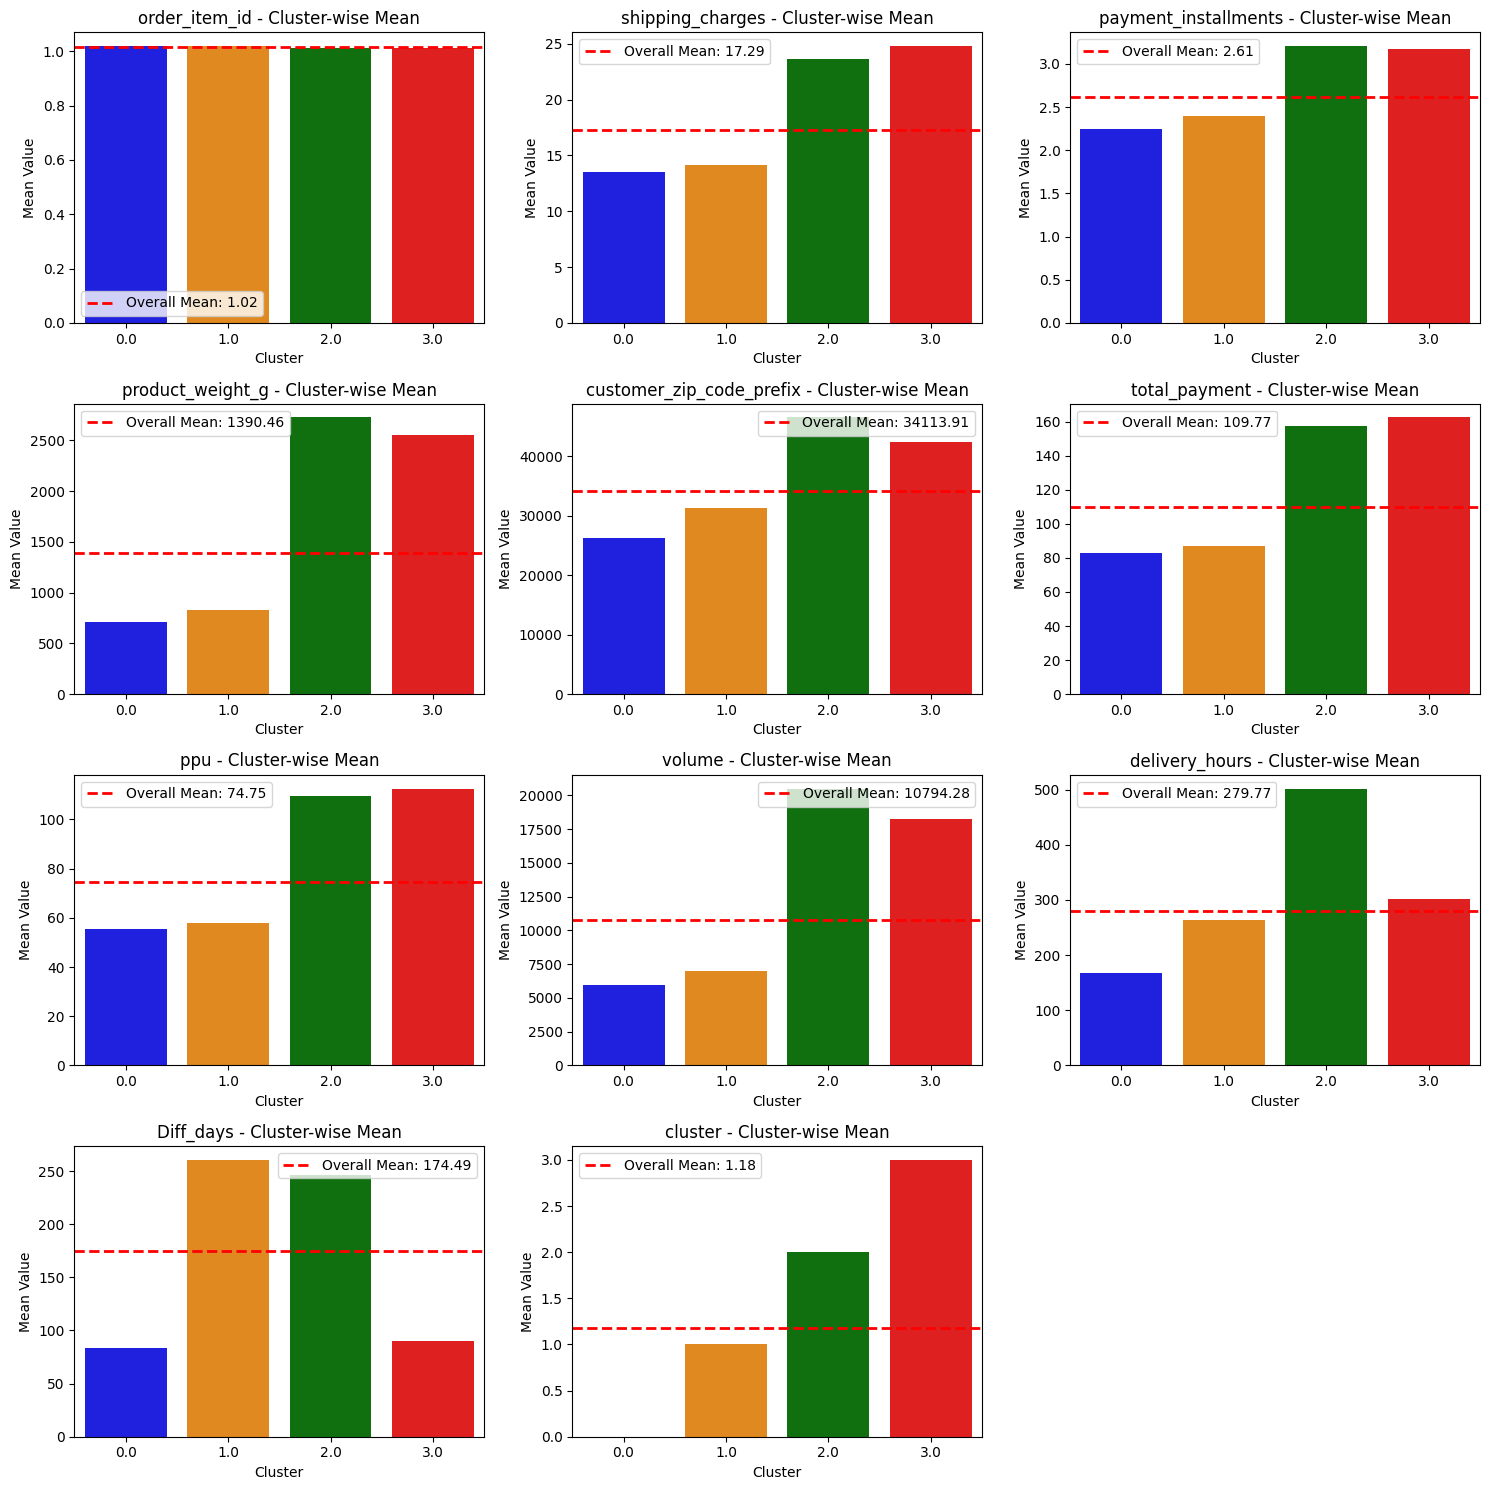

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 수치형 컬럼만 선택
numeric_columns = target_df2.select_dtypes(include=['float64', 'int64']).columns

# 전체 평균 계산
overall_means = target_df2[numeric_columns].mean()

# 색상 매핑
cluster_colors = {0: 'blue', 1: 'darkorange', 2: 'green', 3: 'red'}

# 시각화
plt.figure(figsize=(15, 15))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns) // 3 + 1, 3, i)  # 3열 레이아웃
    
    # 클러스터별 평균 계산
    cluster_means = target_df2.groupby('cluster')[column].mean()

    # 클러스터 색상 적용
    colors = [cluster_colors[cluster] for cluster in cluster_means.index]

    # 막대 그래프 그리기
    sns.barplot(
        x=cluster_means.index,
        y=cluster_means.values,
        palette=colors
    )

    # 전체 평균을 가로선으로 표시
    plt.axhline(
        overall_means[column],
        color='red',
        linestyle='dashed',
        linewidth=2,
        label=f'Overall Mean: {overall_means[column]:.2f}'
    )
    
    # 제목, 축 레이블, 범례 추가
    plt.title(f'{column} - Cluster-wise Mean')
    plt.xlabel('Cluster')
    plt.ylabel('Mean Value')
    plt.legend()

plt.tight_layout()
plt.show()


In [23]:
target_df2 = target_df2.drop(columns=['order_item_id','customer_zip_code_prefix'])

KeyError: 'cluster'

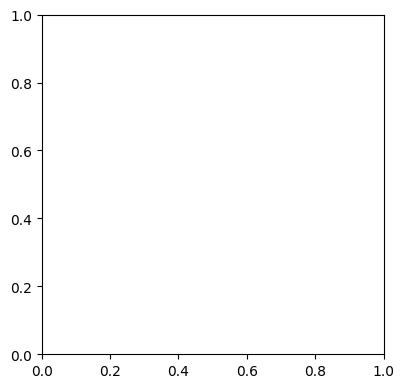

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 수치형 컬럼만 선택
numeric_columns = target_df2.select_dtypes(include=['float64', 'int64']).columns

# 전체 평균 계산
overall_means = target_df2[numeric_columns].mean()

# tab10 팔레트를 클러스터 색상으로 설정
tab10_colors = plt.get_cmap('tab10').colors
cluster_colors = {i: tab10_colors[i] for i in range(len(tab10_colors))}

# 시각화
plt.figure(figsize=(15, 15))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns) // 3 + 1, 3, i)  # 3열 레이아웃
    
    # 클러스터별 평균 계산
    cluster_means = target_df2.groupby('cluster')[column].mean()

    # 막대 그래프 그리기 (hue를 명시적으로 지정)
    sns.barplot(
        x=cluster_means.index,
        y=cluster_means.values,
        hue=cluster_means.index,  # hue를 명시적으로 지정
        palette=[cluster_colors[cluster] for cluster in cluster_means.index]
    )

    # 전체 평균을 가로선으로 표시
    plt.axhline(
        overall_means[column],
        color='black',
        linestyle='dashed',
        linewidth=2,
        label=f'Overall Mean: {overall_means[column]:.2f}'
    )
    
    # 제목, 축 레이블, 범례 추가
    plt.title(f'{column} - Cluster-wise Mean')
    plt.xlabel('Cluster')
    plt.ylabel('Mean Value')

plt.tight_layout()
plt.show()
